# Lineare Regession

Model

$$
\hat{y}_i = \sum_{j=1}^p \beta_j x_{i,j} = x_i \cdot \beta
$$

## Detour: Matrix Dot Product

In [1]:
import numpy as np

In [2]:
a = np.array([1,2,3,4])
b = np.array([3,2,1,2])

In [3]:
np.dot(a,b)

18

In [4]:
a @ b

18

## Synthetische Daten erstellen

In [7]:
n = 21
p = 2
X = np.random.rand(n,p)
X

array([[ 0.45616902,  0.86092154],
       [ 0.75827553,  0.47194698],
       [ 0.94960811,  0.84897227],
       [ 0.20600589,  0.65281605],
       [ 0.79260877,  0.56748835],
       [ 0.9561587 ,  0.54447293],
       [ 0.78219269,  0.20381852],
       [ 0.94175677,  0.20484683],
       [ 0.16234525,  0.00181074],
       [ 0.15806223,  0.28656446],
       [ 0.58093767,  0.38119907],
       [ 0.40323112,  0.70511824],
       [ 0.23093739,  0.10161606],
       [ 0.10019108,  0.04329153],
       [ 0.67528769,  0.08786604],
       [ 0.60034755,  0.53129223],
       [ 0.44946298,  0.37716153],
       [ 0.50774118,  0.31756355],
       [ 0.46623263,  0.46995485],
       [ 0.66977872,  0.68919548],
       [ 0.46426585,  0.48093701]])

In [9]:
beta_true = np.array([-1.3, 2.8])
beta_true

array([-1.3,  2.8])

In [10]:
y_true = X @ beta_true
y_true

array([ 1.81756059,  0.33569336,  1.1426318 ,  1.5600773 ,  0.55857599,
        0.2815179 , -0.44615865, -0.65071268, -0.20597876,  0.59689958,
        0.31213842,  1.45013061, -0.01569365, -0.00903214, -0.63184907,
        0.70716643,  0.47175043,  0.22911442,  0.70977115,  1.05903501,
        0.74307803])

## Detour: Darstellung mittels Matplotlib

In [13]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pylab as plt
from matplotlib import cm

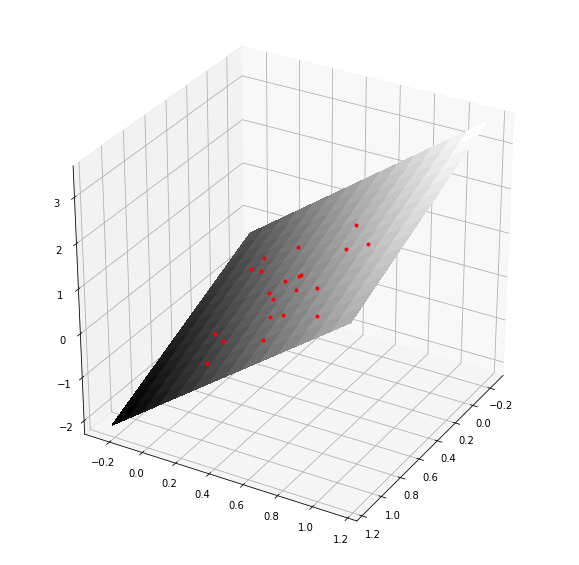

In [20]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')

x0 = np.arange(-0.25,1.25,0.1)
x1 = np.arange(-0.25,1.25,0.1)

X0, X1 = np.meshgrid(x0,x1)
YG = X0 * beta_true[0] + X1*beta_true[1]

ax.view_init(30,30)
ax.plot_surface(X0, X1, YG, cmap=cm.gray, linewidth=1, alpha=1, antialiased=False)

ax.plot(X[:,0], X[:,1], y_true, 'r.')

## Lernen des linearen Modells

SSI (Summed squared error)

Finden eines Parametervektor $\beta^*$ sodass der quadratische Fehler minimal wird

SSI ist eine mögliche Loss Function

SSI = summed squered error = $\sum_{i=1}^n (y_i - \hat{y}_i)^2$

Summe der Abweichungen quadriert entspricht der Matrix Multiplikation

$$
 \sum_{i=1}^n (y_i - \hat{y}_i)^2 = (X \cdot \beta - Y)^T \cdot (X \cdot \beta - Y)
$$

Minimiere die Summe der quadrierten Abweichungen 

$$
\beta^* = argmin_\beta SSE = argmin_\beta (X \cdot \beta - Y)^T \cdot (X \cdot \beta - Y)
$$

Minimierung in einer Funktion entspricht der ersten Ableitung (=min) wo der zeilvektor 0 ist siehe hierzu auch https://en.wikipedia.org/wiki/Matrix_calculus

$$
\beta^* = (X^T \cdot X)^{-1} \cdot X^T \cdot y
$$

In [24]:
np.linalg.inv(X.T @ X)

array([[ 0.46931327, -0.48770468],
       [-0.48770468,  0.70642138]])

In [25]:
np.linalg.inv(X.T @ X) @ X.T @ y_true

array([-1.3,  2.8])

In [29]:
def learn_linear_regression(X, Y):
    beta = np.linalg.inv(X.T @ X) @ X.T @ Y
    return beta

def apply_linear_regression(X, beta):
    y_pred = X @ beta
    return y_pred

## Lernphase 

In [30]:
beta = learn_linear_regression(X, y_true)
beta

array([-1.3,  2.8])

## Testphase

In [31]:
y_pred = apply_linear_regression(X, beta)
y_pred

array([ 1.81756059,  0.33569336,  1.1426318 ,  1.5600773 ,  0.55857599,
        0.2815179 , -0.44615865, -0.65071268, -0.20597876,  0.59689958,
        0.31213842,  1.45013061, -0.01569365, -0.00903214, -0.63184907,
        0.70716643,  0.47175043,  0.22911442,  0.70977115,  1.05903501,
        0.74307803])

# Make it more realistic: Add NOISE !

Gausche standard Abweichung mit 0.11 oder 1.22 (hoher noise Abweichung)

In [41]:
sigma = 0.2
noise = sigma * np.random.randn(n)
noise

array([-0.03256013, -0.05836776, -0.42488208,  0.16348242, -0.33957067,
       -0.01304498,  0.18339087,  0.13939778, -0.52801517, -0.33057294,
        0.1993461 ,  0.03312765,  0.11643196,  0.22195994, -0.5854837 ,
        0.00936939,  0.09818221,  0.13795627, -0.40608389,  0.10211772,
       -0.26308387])

In [42]:
y_true = X @ beta_true + noise
y_true

array([ 1.78500046,  0.2773256 ,  0.71774972,  1.72355972,  0.21900532,
        0.26847292, -0.26276778, -0.51131489, -0.73399393,  0.26632664,
        0.51148453,  1.48325826,  0.10073831,  0.2129278 , -1.21733277,
        0.71653582,  0.56993264,  0.36707069,  0.30368726,  1.16115273,
        0.47999416])

In [39]:
learn_linear_regression(X, y_true)

array([-2.10379308,  2.60393499])

Wie sieht es aus wenn nur die ersten drei verwendet werden ?

In [40]:
learn_linear_regression(X[:3], y_true[:3])

array([-0.78481629,  2.90253172])

In [43]:
y_pred = apply_linear_regression(X, beta)

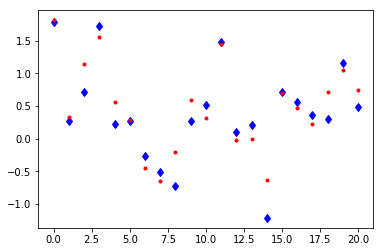

In [45]:
x = list(range(len(y_true)))
plt.plot(x,y_true, 'bd', x, y_pred, 'r.')

##### Summed Squared Error

In [51]:
SSE = np.sum((y_pred - y_true)**2)
SSE

1.4880939237308382

##### Mean squared error

In [53]:
MSE = np.mean((y_pred - y_true)**2)
MSE

0.070861615415754198

##### Root Mean Square Error

In [54]:
RMSE = np.sqrt(np.mean((y_pred - y_true)**2))
RMSE

0.26619845118962321